#  Algeria Forest Fire - Regression 

## About this notebook :

In this notebook we would like to perform regression analysis for a given dataset. The EDA for this dataset can be found in :
For regression analysis, Linear Regression, KNN Regression, SVR, Decision Tree Regressor, 
Random Forest Regressor models were used.
We take a look at the model evaluation metrics - MAE, MSE, RMSE, R2 score, adjusted R2 score for each model. 
We also study the residual plots and carry out cross-validation-score to check overfitting. 
Looking at the values we finally decide which model to use for prediction.

During this analysis many online resources were very helpful. A list of these articles/blogs are listed at the end as references.


In [1]:
#basic imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
pd.pandas.set_option('display.max_rows', None)

from matplotlib import *
import sys
from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports from sklearn regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# standardization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [4]:
#  import from sklearn - metrices
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [5]:
pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire




1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

We have data from two different regions : Bejaia Region and Sidi-Bel Abbes Region


In [6]:
# import data : 

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
"""
if we do not use header = 1 then we can do this :
df1 = df.reset_index()
df1.loc[0]
df2 = df1.iloc[1:,:]
df2.columns = df1.loc[0]
df2.head()

"""
df2 = df.copy()

df2.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
# we need to include region in dataframe as the data is from two different regions. 
# Bejaia Region and Sidi-Bel Abbes Region
# finding out the index :
d2_index = df[df['day']=='Sidi-Bel Abbes Region Dataset'].index.values
d2_index

df2.loc[:122,'Region'] = 1
df2.loc[122:,'Region'] = 2
#df2[['Region']] = df[['Region']].astype(int)
     
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


## Observation 
1. Total number of rows : 246
2. Except for 'day', 245 non null objects. ie. 1 nan value object. For 'classes'
we have 2 nan objects
3. Though the dataframe looks numerical but the type is object. Need to change this to 
integer type or float type as per requirement. 
4. We need to check whether the nan values corresponds to a single row or different row. If that corresponds to a single row, may be we can drop that. If not may be we 
can replace the nan value with median value of that particular column.
5. The 'classes' column has 'fire' and 'not fire'. This we have to change it to '1' and '0' respectively. 
6. We need to find out the unique values so that we can differentiate categorical and 
numerical data.

In [10]:
df2.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
df2.shape

(246, 15)

In [12]:
df2.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
featlist = [feature for feature in df2.columns]
print(type(featlist))
featlist

<class 'list'>


['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ',
 'Region']

In [14]:
# let us find out no of unique data for each and every feature

for feature in featlist :
    print(f'Feature {feature} has {len(df2[feature].unique())} number of unique values.')

Feature day has 33 number of unique values.
Feature month has 6 number of unique values.
Feature year has 3 number of unique values.
Feature Temperature has 21 number of unique values.
Feature  RH has 64 number of unique values.
Feature  Ws has 20 number of unique values.
Feature Rain  has 41 number of unique values.
Feature FFMC has 175 number of unique values.
Feature DMC has 168 number of unique values.
Feature DC has 200 number of unique values.
Feature ISI has 108 number of unique values.
Feature BUI has 176 number of unique values.
Feature FWI has 129 number of unique values.
Feature Classes   has 10 number of unique values.
Feature Region has 2 number of unique values.


## Observation :
1. day, month, year, temp, rain, rel humity, wind speed can be treated as categorical feature
2. the rest of them can be treated as continous feature.
3. day, month, year can be assigned to integer type. 
4. rest of them can be assigned to floating type. 

In [15]:
# finding out the location of text values : 
for feature in featlist :
    print(feature, df2[df2[feature] == feature].index.values)

day [123]
month [123]
year [123]
Temperature [123]
 RH [123]
 Ws [123]
Rain  [123]
FFMC [123]
DMC [123]
DC [123]
ISI [123]
BUI [123]
FWI [123]
Classes   [123]
Region []


## Observation : 
This row, i.e row 123 contains only the feature name. Hence, can be dropped. 

In [16]:
# finding out the location of null values : 
for feature in featlist :
    print(feature, df2[df2[feature].isnull()].index.values)

day []
month [122]
year [122]
Temperature [122]
 RH [122]
 Ws [122]
Rain  [122]
FFMC [122]
DMC [122]
DC [122]
ISI [122]
BUI [122]
FWI [122]
Classes   [122 167]
Region []


In [17]:
df2.loc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Region                                   2.0
Name: 122, dtype: object

## Observation :
We can also drop row 122. The values in it of no interest

In [18]:
# dropping row 123 and 124 : 

df2.drop([122,123],inplace=True)

In [19]:
m_index = df2[df2['DC']=='14.6 9'].index.values # fixing a particular row, where the values are misplaced
m_index[0]

167

In [20]:
df2['DC'].loc[m_index[0]]

'14.6 9'

In [21]:
df2.loc[m_index[0]]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region             2.0
Name: 167, dtype: object

In [22]:
# tweaking row 168 manually to fix the discrepencies.

df2['DC'].loc[m_index[0]] = '14.6'
df2['ISI'].loc[m_index[0]] = '9'
df2['BUI'].loc[m_index[0]] = '12.5'
df2['FWI'].loc[m_index[0]] = '10.4'
df2['Classes  '].loc[m_index[0]] = 'fire   '
df2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1.0
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1.0
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1.0
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1.0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1.0


In [23]:
# let us assign the features to data type

df2['day'] = df2['day'].astype(int)
df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)

df2['Temperature'] = df2['Temperature'].astype(float)
df2[' RH'] = df2[' RH'].astype(float)
df2[' Ws'] = df2[' Ws'].astype(float)
df2['Rain '] = df2['Rain '].astype(float)
df2['FFMC'] = df2['FFMC'].astype(float)
df2['DMC'] = df2['DMC'].astype(float)
df2['DC'] = df2['DC'].astype(float)
df2['ISI'] = df2['ISI'].astype(float)
df2['BUI'] = df2['BUI'].astype(float)
df2['FWI'] = df2['FWI'].astype(float)


# changing the classes to 1 and 0 : 
#label encoding: 
#df2['Classes  '] = df2['Classes  '].map({'not fire   ':'0', 'fire   ':'1'})
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [24]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
df2['Classes  '].loc[84]

'fire   '

In [26]:
df2['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

## Observation :
The string 'fire' and 'not fire' has many varieties. We need to make them all uniform:

In [27]:
df2['Classes1'] = df2['Classes  '].apply(lambda x : x.replace(" ", ""))
df2['Classes1'].unique()

array(['notfire', 'fire'], dtype=object)

In [28]:
# now we can use label encoding : 
df2['Classes1'] = df2['Classes1'].map({'notfire' : '0', 'fire' : '1'})

In [29]:
df2.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Classes1       0
dtype: int64

## Comments :
Till now we have done data preprocessing: 
1. made the data set in a proper way : rows and columns
2. Dropped row 123, 124. 
3. Fixed the values of cloumns manually for row 168

In [30]:
# checking if the data set is balanced or imbalanced :
data = df2.copy()
df2['Classes1'].value_counts()

1    138
0    106
Name: Classes1, dtype: int64

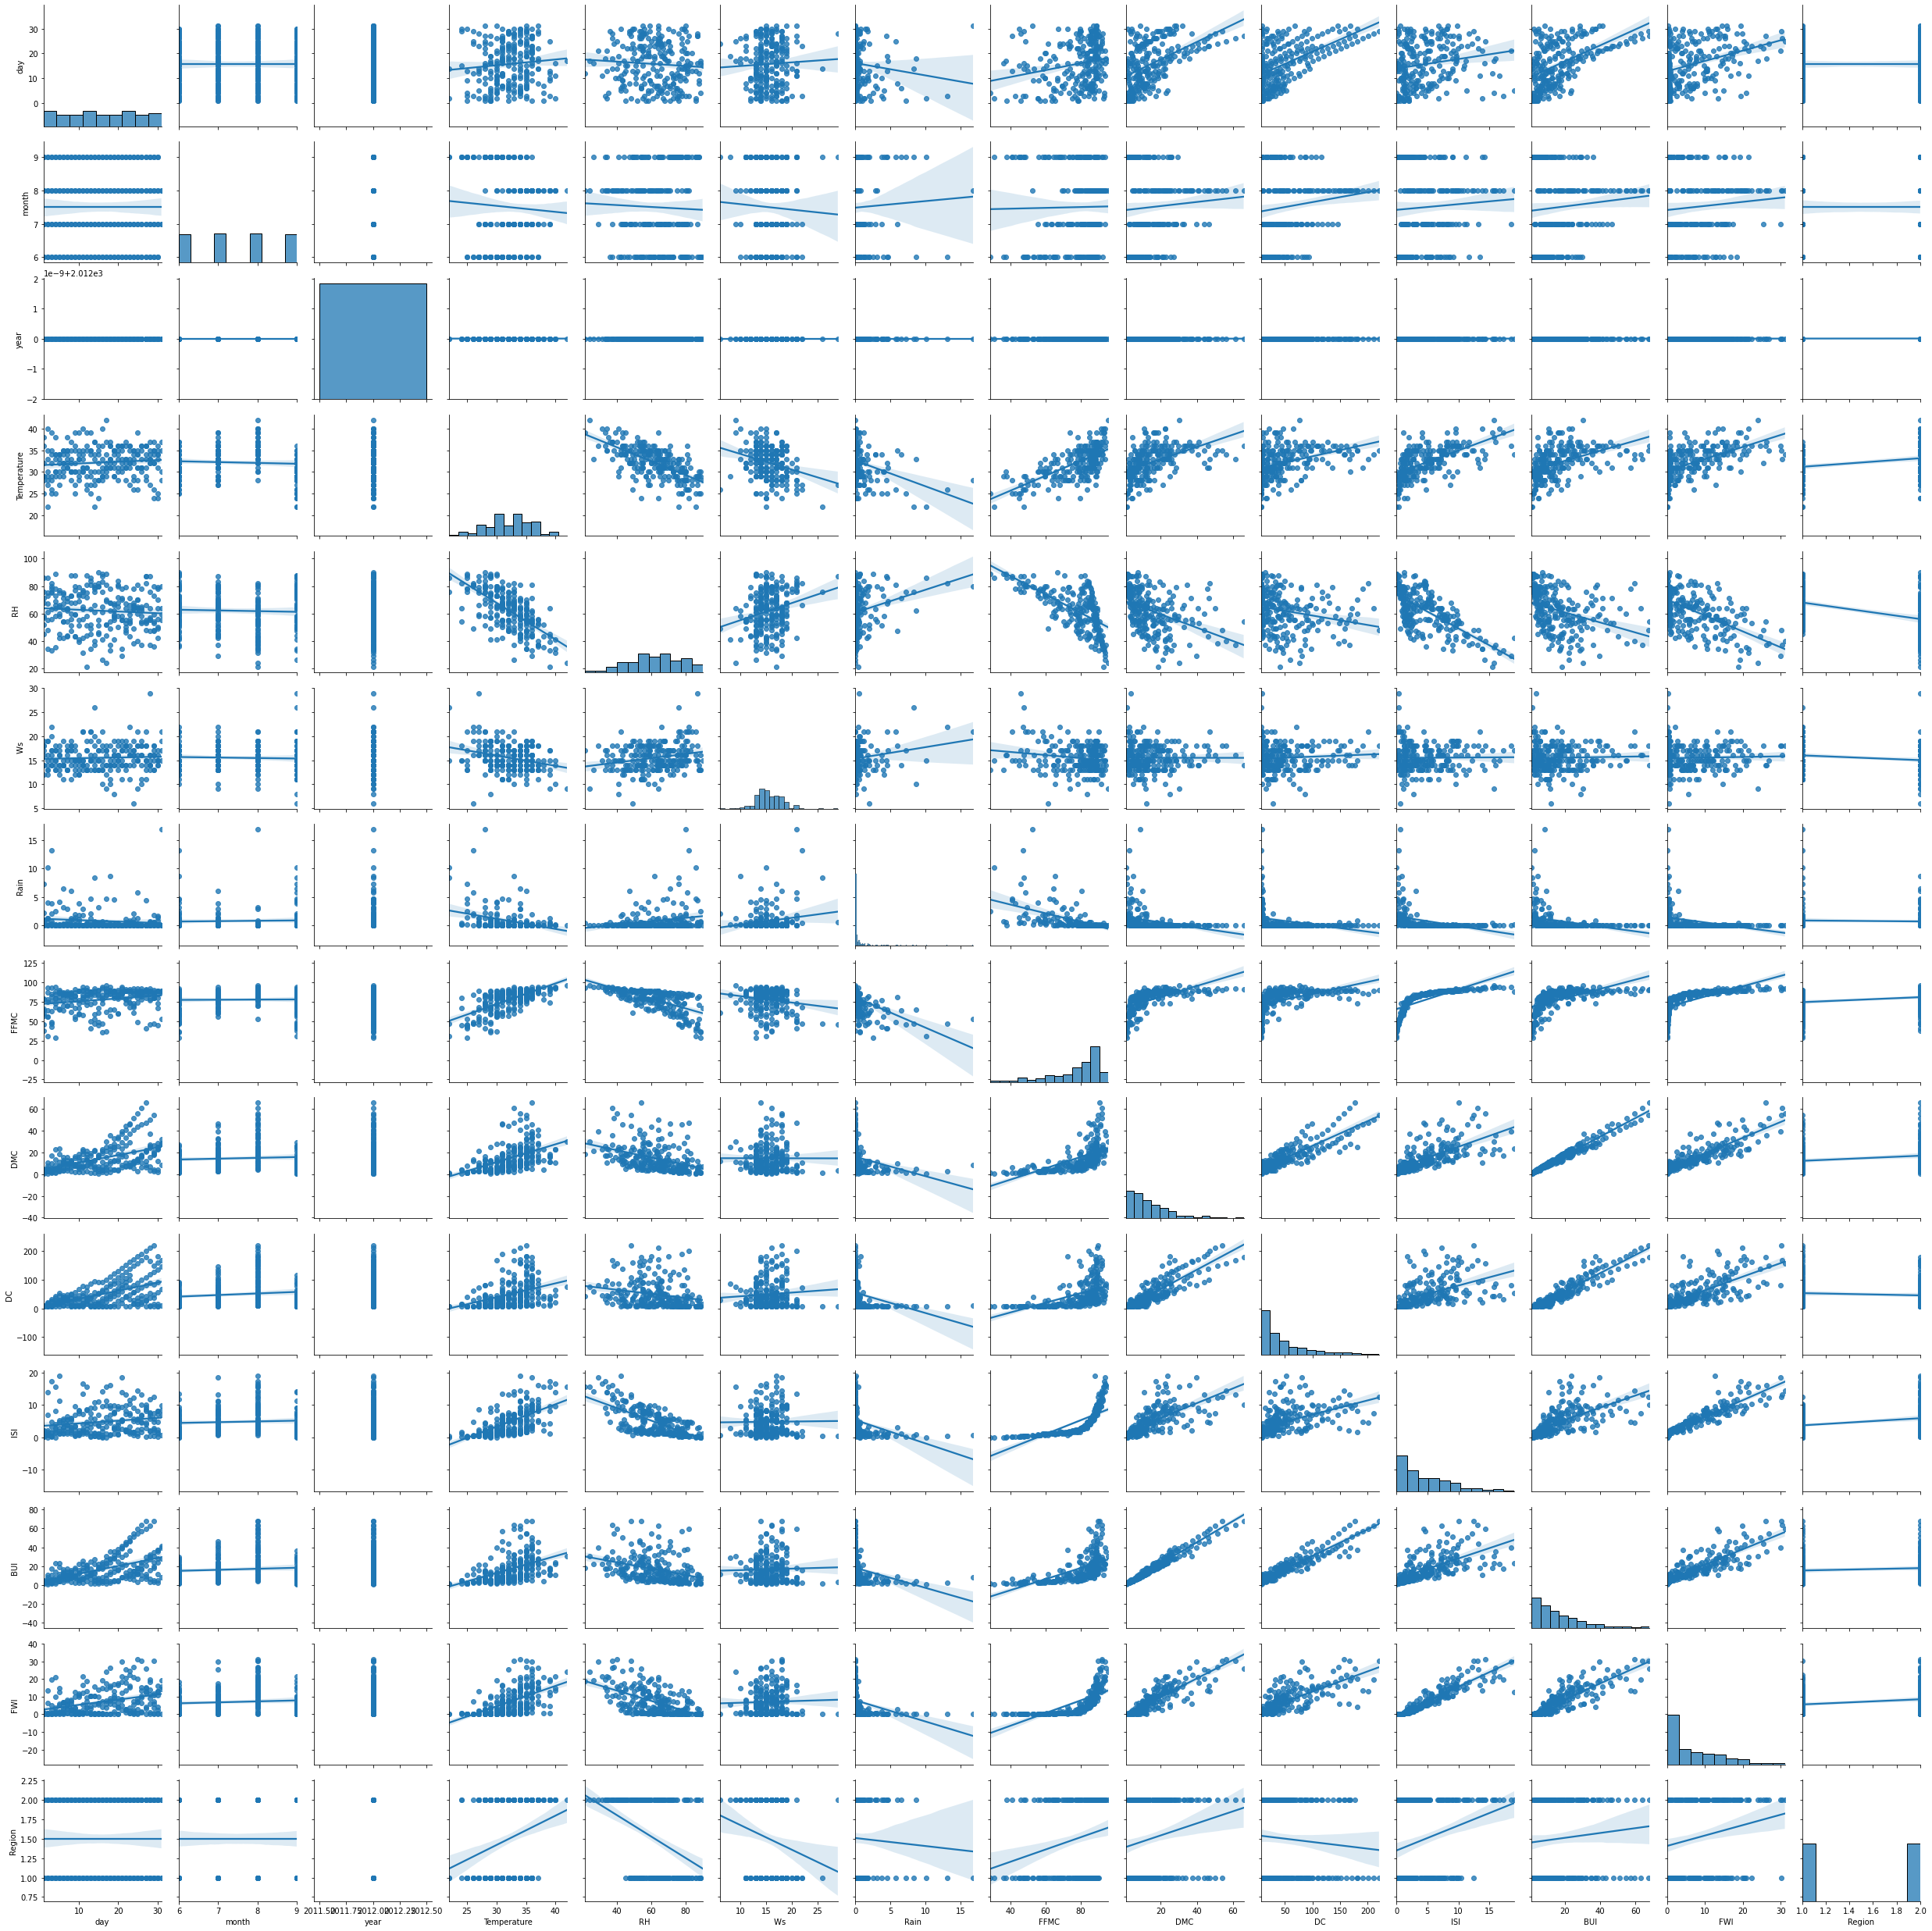

In [31]:
sns.pairplot(data, kind = 'reg')

In [32]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,3.909990e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-2.023760e-16
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02


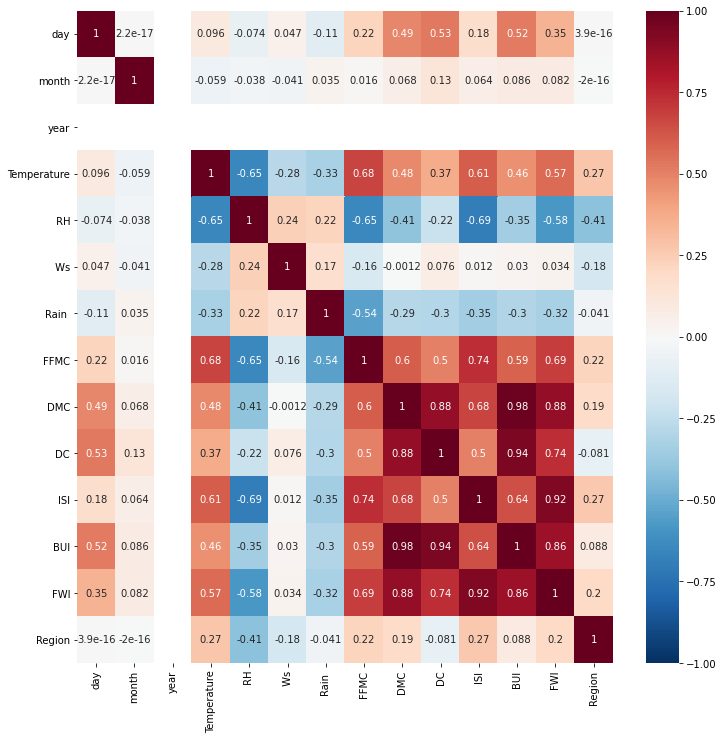

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Observation : 
1. The features FFMC, DMC, DC, ISI, BUI and FWI are highly correlated.
2. Only temperature is moderately correlated with these features. 
3. Wind speed is not at all correlated with FFMC, DMC, DC, ISI, BUI and FWI. 
4. Relative humidity and rain are negatively correlated with FFMC, DMC, DC, ISI, BUI and FWI. 

# Features for Regression problem : 

From the visual data analysis it has been observed that For Fire cases FWI is really high. So for regression analysis we should try to find out FWI for the given set of Features. So, higher FWI will automatically point to higher probability of fire incident. So, for Regression problem we should omit 'FWI' from the input features.


## Multicollinearity check : 

Because of the above observation, we need to take a multicollinearity test before variable selection for model building. In this study we will be using VIF (Variable Inflation Factor) to detect multicollinearity. This check is very important for the Regression analysis, as in Regression analysis, the features are considered to be independent from one another. So we need to check if the features are correlated and if they are we should try to quantify them before proceeding further.

In [34]:
# Let us calculate vif : 

x = data[['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)

        feature         VIF
0           day    6.074943
1         month   40.128249
2   Temperature  102.968925
3            RH   33.172044
4            Ws   34.920373
5         Rain     1.716072
6          FFMC  111.386109
7           DMC  183.520406
8            DC   52.090075
9           ISI   53.452447
10          BUI  406.956106
11          FWI   76.904575


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


x1 = data[['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
x = add_constant(x1)
#print(x)

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data) 

        feature         VIF
0         const  515.884875
1           day    1.486174
2         month    1.089417
3   Temperature    2.421438
4            RH    2.783453
5            Ws    1.301988
6         Rain     1.550481
7          FFMC    4.127608
8           DMC   76.361945
9            DC   25.287843
10          ISI   23.216773
11          BUI  171.252436
12          FWI   40.484087


In [36]:
# The below code is taken from : 
# https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f


from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


calculate_vif(df=data, features=['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'])

,VIF,Tolerance
day,1.486174,0.672869
month,1.089417,0.917922
Temperature,2.421438,0.412978
RH,2.783453,0.359266
Ws,1.301988,0.768056
Rain,1.550481,0.644961
FFMC,4.127608,0.242271
DMC,76.361945,0.013096
DC,25.287843,0.039545
ISI,23.216773,0.043072


# Discussion about finding vif from sklearn and stats model : 
----------------------------
---------------------------
--------------------




- For the above mentioned analysis we will surely omit the feature 'BUI' as that has high VIF value. 


## Observation : 
We observe that the feature 'BUI' has the largest VIF value. According to the practice 
we must move this variable before builing the model. But before proceeding for the regression problem we need to re-run the check on VIF values for the remaining features. If any of the feature has non-explainable VIF, we should remove that before model 
building.

In [37]:
calculate_vif(df=data, features=['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI'])

,VIF,Tolerance
day,1.486158,0.672876
month,1.084140,0.922390
Temperature,2.418827,0.413424
RH,2.752118,0.363357
Ws,1.301731,0.768208
Rain,1.543375,0.647931
FFMC,3.976239,0.251494
DMC,11.367783,0.087968
DC,6.106633,0.163756
ISI,22.264625,0.044914


In [38]:
calculate_vif(df=data, features=['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI'])

,VIF,Tolerance
day,1.483046,0.674288
month,1.084039,0.922476
Temperature,2.417741,0.413609
RH,2.750376,0.363587
Ws,1.301319,0.768451
Rain,1.542386,0.648346
FFMC,3.665749,0.272796
DMC,6.880180,0.145345
DC,5.484516,0.182331
ISI,3.961094,0.252456


Observation : Looking at the table above, we might want to remove DMC. 

In [39]:
calculate_vif(df=data, features=['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DC', 'ISI'])

,VIF,Tolerance
day,1.444969,0.692056
month,1.069669,0.934868
Temperature,2.417106,0.413718
RH,2.748057,0.363893
Ws,1.271474,0.786489
Rain,1.518733,0.658444
FFMC,3.665654,0.272803
DC,2.164068,0.462093
ISI,3.266029,0.306182


The above VIF values look good. So we can now finalize the input features. 

## Final features for Regression Problem :  

So, for regression problem we will like to predict 'FWI' as output features. The input features are : 
'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI'.

In [40]:
# input features : 
X = data[['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI']]
# output features
y = data['FWI']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
## scaling part for linear, logistic and knn should go here. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
regessor = LinearRegression() 
regessorlasso = Lasso()
regessorridge = Ridge()
regessorknn = KNeighborsRegressor()
regessorsvr = SVR()
regessordt = DecisionTreeRegressor()
regressorRF = RandomForestRegressor()

In [44]:
regessor.fit(X_train_scaled, y_train)
regessorlasso.fit(X_train_scaled, y_train)
regessorridge.fit(X_train_scaled, y_train)
regessorknn.fit(X_train_scaled, y_train)
regessorsvr.fit(X_train_scaled, y_train)
regessordt.fit(X_train, y_train)
regressorRF.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
predict_liregression = regessor.predict(X_test_scaled)
predict_lasso = regessorlasso.predict(X_test_scaled)
predict_ridge = regessorridge.predict(X_test_scaled)
predict_knn = regessorknn.predict(X_test_scaled)
predict_dtr = regessordt.predict(X_test)
predict_svr = regessorsvr.predict(X_test_scaled)
predict_rf = regressorRF.predict(X_test)


In [46]:
# putting everything in one place. 

ltype = [predict_liregression, predict_lasso, predict_ridge, predict_knn, predict_dtr, predict_svr, predict_rf]

lr2 = list()
ladjr2 = list()
lmae = list()
lmse = list()
lrmse = list()

n_obs = len(X_train)
no_feat = len(X_train.columns)


for i in ltype: 
    lr2.append(r2_score(y_test, i))
    adj_R2 = 1 - ((1 - r2_score(y_test, i)) * (n_obs - 1)/(n_obs - no_feat - 1))
    ladjr2.append(adj_R2)
    lmae.append(mean_absolute_error(y_test, i))
    lmse.append(mean_squared_error(y_test, i))
    lrmse.append(np.sqrt(mean_squared_error(y_test, i)))
    
    
    
dfscore = pd.DataFrame({'R2 Score' : lr2, 'Adjusted R2': ladjr2, 'MAE' : lmae, 'MSE': lmse, 'RMSE' : lrmse}, 
                         index = ['Linear Regression', 'Lasso', 'Ridge', 
                                  'KNN', 'Decision Tree', 'SVR', 'Random Forest'])
dfscore.sort_values(by=['R2 Score'], ascending = False)

,R2 Score,Adjusted R2,MAE,MSE,RMSE
Linear Regression,0.990933,0.990363,0.434871,0.521064,0.721848
Random Forest,0.975947,0.974435,0.671541,1.382251,1.175692
Ridge,0.970954,0.969127,0.905671,1.669191,1.291972
Decision Tree,0.960199,0.957695,0.994595,2.287297,1.512381
KNN,0.922718,0.917858,1.389189,4.441200,2.107415
SVR,0.849836,0.840391,1.585822,8.629589,2.937616
Lasso,0.450979,0.416449,4.249345,31.550934,5.617022


Observation : 
Looking at the above table it seems that Linear Regression works pretty well. Next comes Random Forest, 
Ridge and Desicion Tree. 

Now let us look at some plots and verify if outcome is same is above.

In [47]:
lnames = ['Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

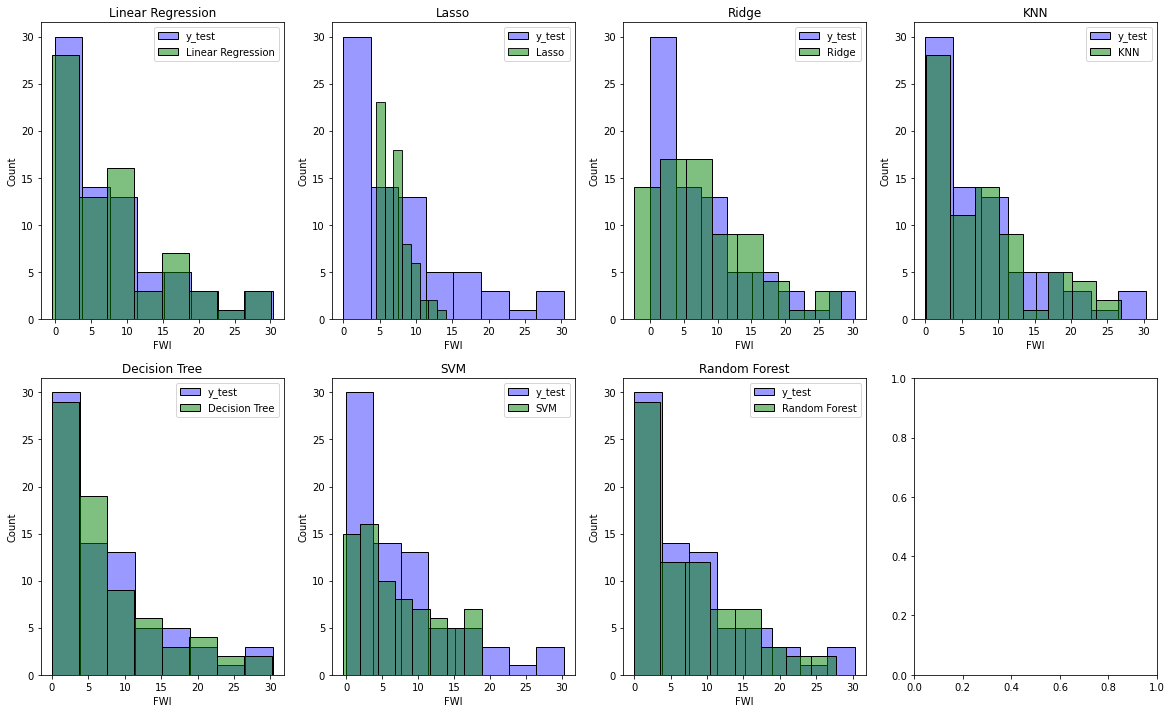

In [48]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.histplot(y_test, color = 'Blue',  ax=axes[i,j], label = 'y_test', legend=True, alpha = 0.4)
    sns.histplot(ltype[items], color = 'green', ax=axes[i,j], label = lnames[items], alpha = 0.5, legend=True)
    axes[i,j].set_title(lnames[items])
    axes[i,j].legend(['y_test', lnames[items]])
       
    
plt.show()

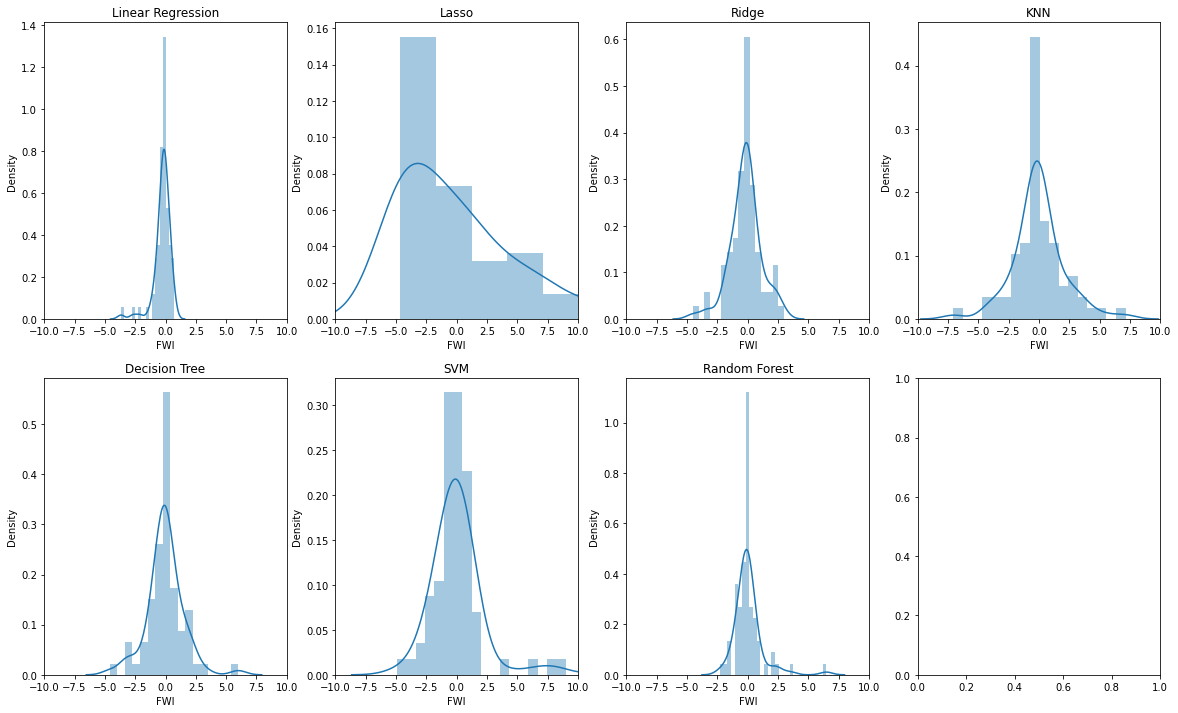

In [49]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.distplot(y_test - ltype[items], ax=axes[i,j])
    axes[i,j].set_title(lnames[items])   
    axes[i,j].set(xlim=(-10, 10))
    
    
plt.show()

# Observations : 
    

- From the above table it is seen that Linear Regression and Ridge  models have very good R2 scores compare to other models. However, the distribution plots show the spread of deviation is very small but the deviations are asymmetrically distributed about zero. This suggests that there is a bias in predicted values. This might be case of low variance and high bias. This means that we need better optimization or these models may not describe the generalized data. 

- In case of Lasso, KNN and SVM, the variance is more. Addtionally, Lasso has bias. 

- Where as, in case of Decision tree and Random forest, deviations are symmetrically spread about zero and they are reasonably small. In case of Random Forest we have low variance (also evident from the R2 score) and low bias (evident from the above distribution plot).

    

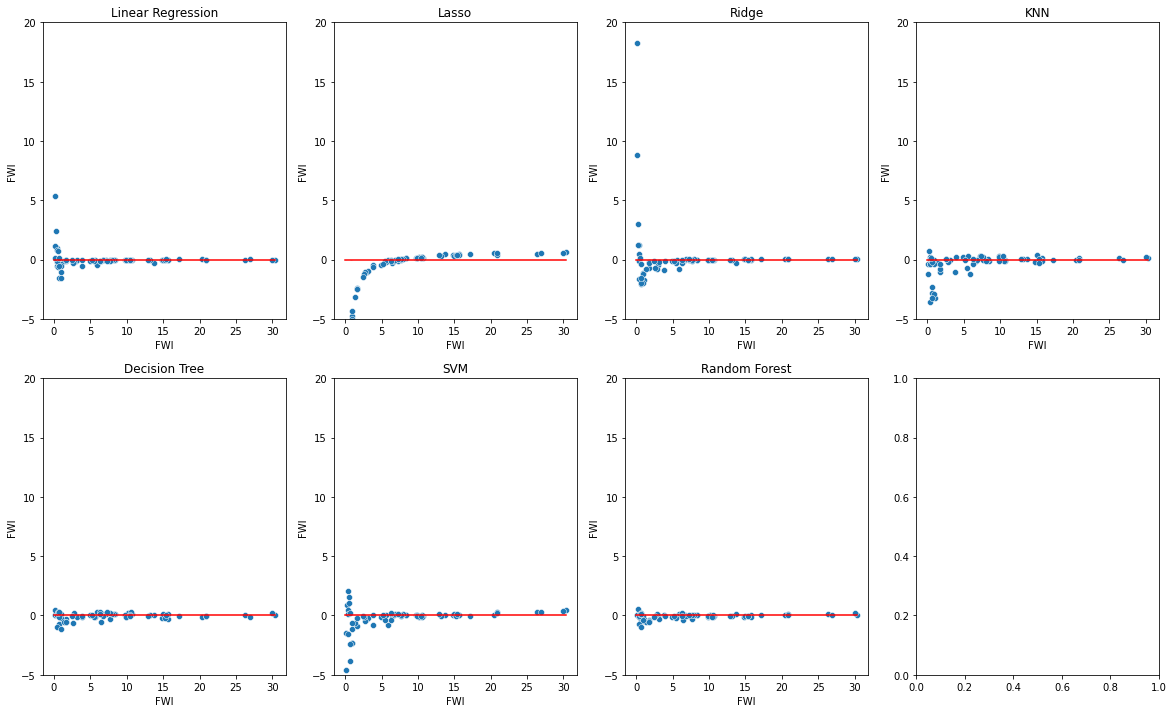

In [50]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    #sns.distplot(y_test - ltype[items], ax=axes[i,j])
    sns.scatterplot(x= y_test, y = (y_test-ltype[items])/y_test, ax=axes[i,j])
    sns.lineplot(y_test, y_test - y_test, color = 'red', ax = axes[i,j])
    axes[i,j].set_title(lnames[items])    
    axes[i,j].set(ylim=(-5, 20))
    
plt.show()

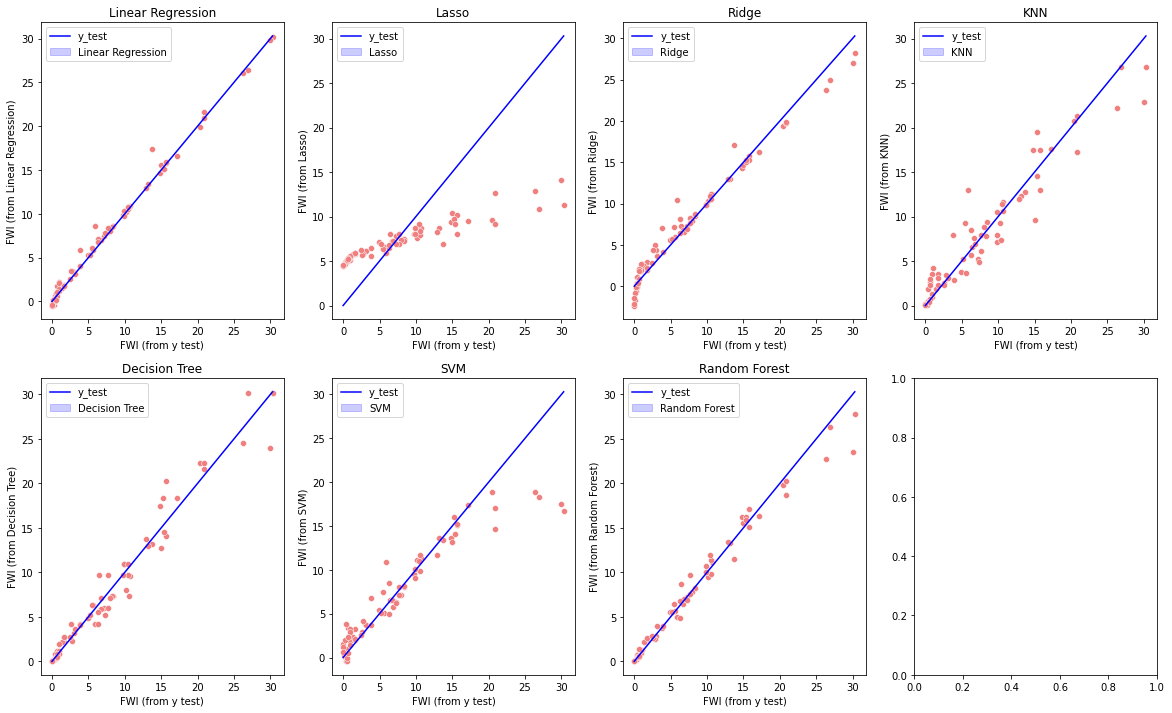

In [51]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.scatterplot(y_test, ltype[items], color = 'lightcoral', legend = True, ax=axes[i,j])
    axes[i,j].set_title(lnames[items])    
    axes[i,j].set_xlabel('FWI (from y test)')
    axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

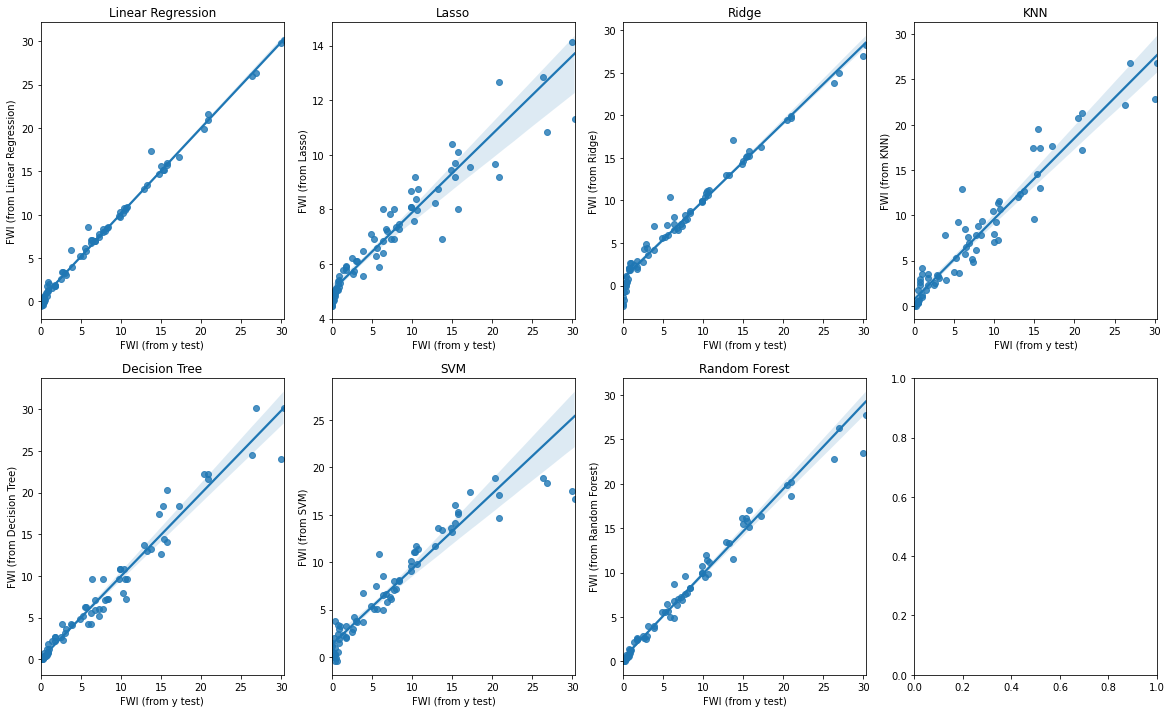

In [52]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    #sns.lineplot(y_test, y_test, color = 'cyan', legend = True, ax=axes[i,j])
    sns.regplot(y_test, ltype[items], robust = True, ax=axes[i,j])
    axes[i,j].set_title(lnames[items])    
    axes[i,j].set_xlabel('FWI (from y test)')
    axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    #axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

# Comments : 

| Model	|R2 Score 	|Adjusted R2 	|MAE 	|MSE 	|RMSE|
|:-     | :-        | :-            | :-    | :-    | :- |    
|Linear Regression| 0.990933  | 0.990363 |	0.434871  |	0.521064 |	0.721848|
|Random Forest| 	0.975947  |	0.974435 |	0.671541  |	1.382251 |	1.175692|
|Ridge        |	    0.970954  |	0.969127 |	0.905671  |	1.669191 |	1.291972|
|Decision Tree |  	0.960199  |	0.957695 |	0.994595  |	2.287297 |	1.512381|
|KNN 	       |    0.922718  |	0.917858 |	1.389189  |	4.441200 |	2.107415|
|SVR 	       |    0.849836  |	0.840391 |	1.585822  |	8.629589 |	2.937616|
|Lasso 	       |    0.450979  |	0.416449 |	4.249345  |	31.550934 |	5.617022|


Looking at table we observe: 
1. R2 score is the highest for Linear Regression. So, one may use this model to predict FWI (our output variable for the regression problem). 

2. Also we observe that the R2 score for Random Forest is not significantly less than Linear Regression. Moreover, the MAE is quite less (~ 24%) than Linear Regression.   

3. Ridge gives a result in between Linear Regression model and Random Forest.  


- So, now the question arises which model to be used.
One can always go with the model which can be intrepreted visually and has lesser number of parameters. So, one can go with Linear Regression. But if one also take in account of MAE and observe the fitting and data, then one should go with Random Forest. 

- This far, things are good and we can use any of the above model for prediction. But before doing that we need to confirm that our model is not overfitting. To check that we need to do cross validation of the above models 
and then conclude anything.    

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
list_model_instance = [regessor, regessorlasso, regessorridge, regessorknn, regessorsvr, regessordt, regressorRF]

In [55]:
for items in list_model_instance: 
    scores = cross_val_score(items, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10, verbose=1)
    meanscores = np.mean(scores)
    print(items, meanscores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression() -2.4973046105728023
Lasso() -2.5801267124438345
Ridge() -2.496147563247822
KNeighborsRegressor() -10.568703529411765


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR() -15.660110174085801
DecisionTreeRegressor() -4.549000000000001
RandomForestRegressor() -1.50605807647059


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [56]:
for items in list_model_instance: 
    scores = cross_val_score(items, X_train, y_train, scoring = 'r2', cv = 10, verbose=1)
    meanscores = np.mean(scores)
    print(items, meanscores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression() 0.9367287776356154
Lasso() 0.9346588743008463


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge() 0.9367467098744366
KNeighborsRegressor() 0.7882425466864593


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR() 0.697037495023827


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeRegressor() 0.9178149524292841
RandomForestRegressor() 0.9660102158613115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


It is observed that Random Forest is the best one, then comes the Linear Regression. 
But as we have mentioned earlier, as the no. of observation set is not a huge one and number of 
features are too many, one should proceed with Linear Regression as it is a simple model to interpret. 

## Further analysis : 

One can also think of Linear Regression as a base model and perform Gridsearch for Ridge 
and Random Forest and look for obtaining better parameters which will explain data better than what we have now.  

# References : 
      
1. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/  

2. https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f   

3. https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a    

4. https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf   

5. https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

6. https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b  

7. https://www.kaggle.com/code/sjodcre/multicollinearity-and-how-it-affects-your-model  

8. https://towardsdatascience.com/how-to-choose-the-best-linear-regression-model-a-comprehensive-guide-for-beginners-754480768467  

9. https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/